<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/Leetcode_2021_MayJune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

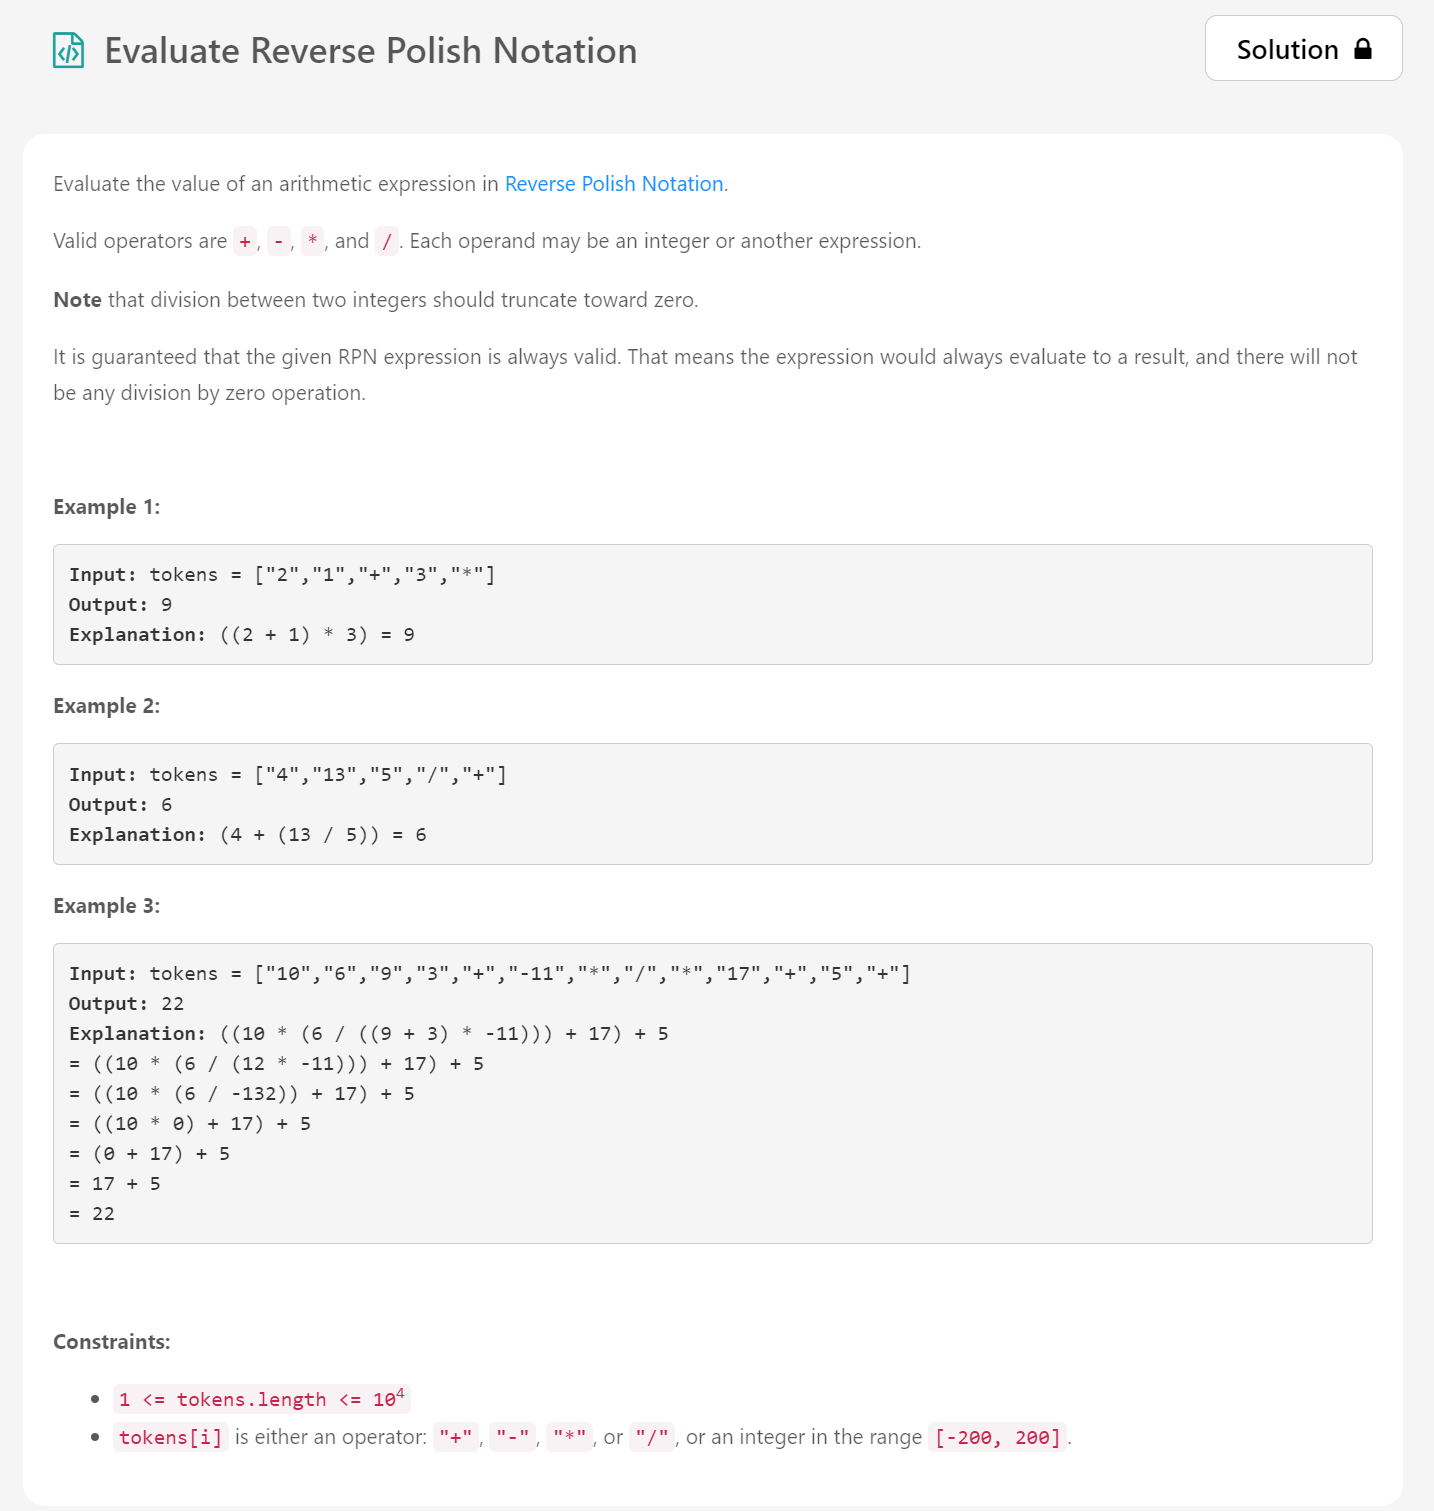

In [ ]:
# Using stack
class Solution:
    def evalRPN(self, tokens: List[str]) -> int:
        stk = []
        for token in tokens:
            # token is operand
            if token in "+-*/":
                y = stk.pop()
                x = stk.pop()
                if token == "+":
                    stk.append(x + y)
                elif token == "-":
                    stk.append(x - y)
                elif token == "*":
                    stk.append(x * y)
                elif token == "/":
                    stk.append(int(x/y))
            else:
                # token is number
                stk.append(int(token))


        return stk.pop()
        

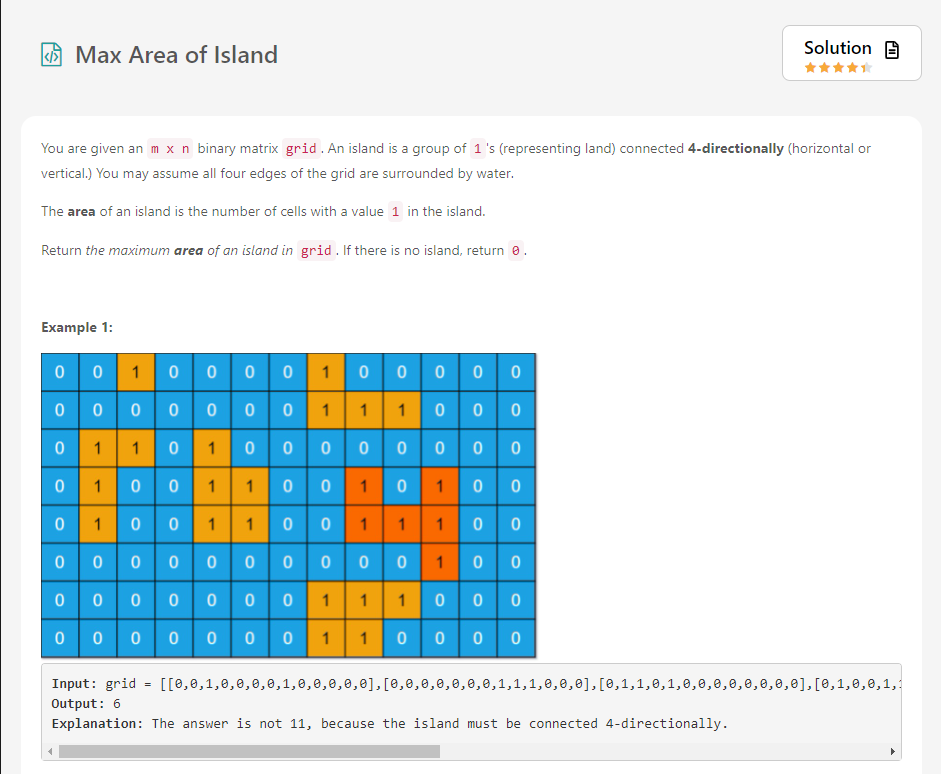

In [ ]:
# Input: grid = [[0,0,0,0,0,0,0,0]]
# Output: 0
 

# Constraints:

# m == grid.length
# n == grid[i].length
# 1 <= m, n <= 50
# grid[i][j] is either 0 or 1.



class Solution:
    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
        rows, cols = len(grid), len(grid[0])
        neighbours = [(1,0), (-1,0), (0,1), (0,-1)]
        max_area = 0
        
        def depth_first_search(r, c):
            # put the checked cell to zero
            grid[r][c] = 0
            cur_area = 1
            
            for dr, dc in neighbours:
                # check boundary and if the neighbour cell = 1
                if 0 <= r + dr < rows and 0 <= c + dc <cols and grid[r+dr][c+dc] == 1:
                    cur_area  += depth_first_search(r+dr, c+dc)
            return cur_area
        
        for r in range(rows):
            for c in range(cols):
                if grid[r][c] == 1:
                    max_area = max(max_area, depth_first_search(r,c))
                    
        return max_area

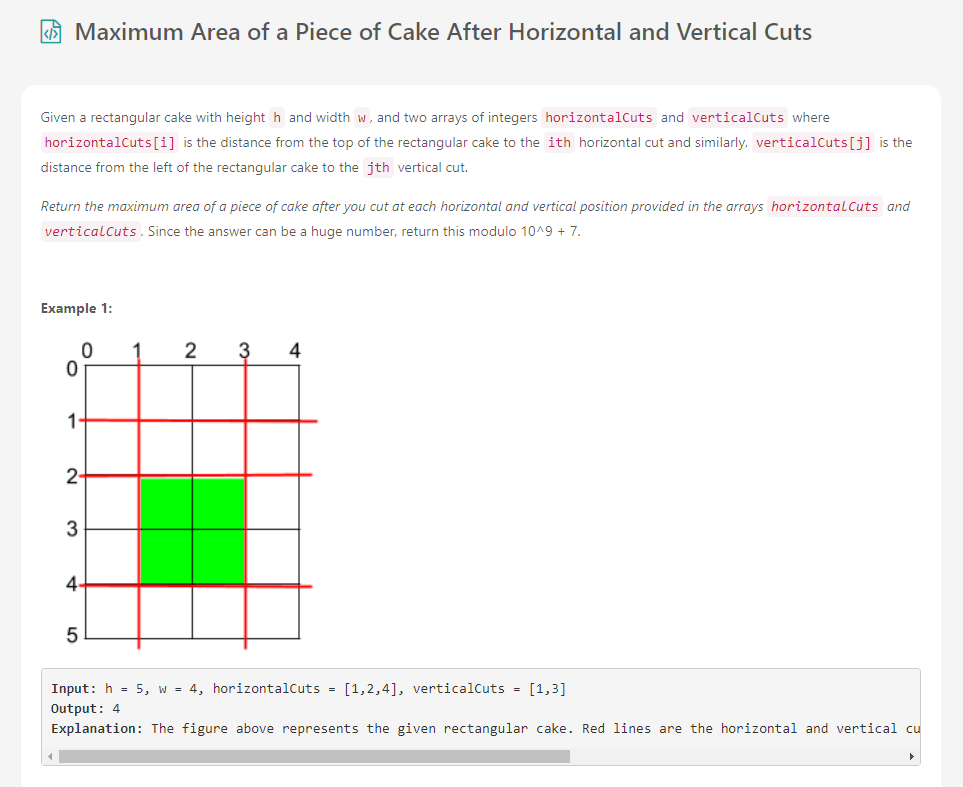

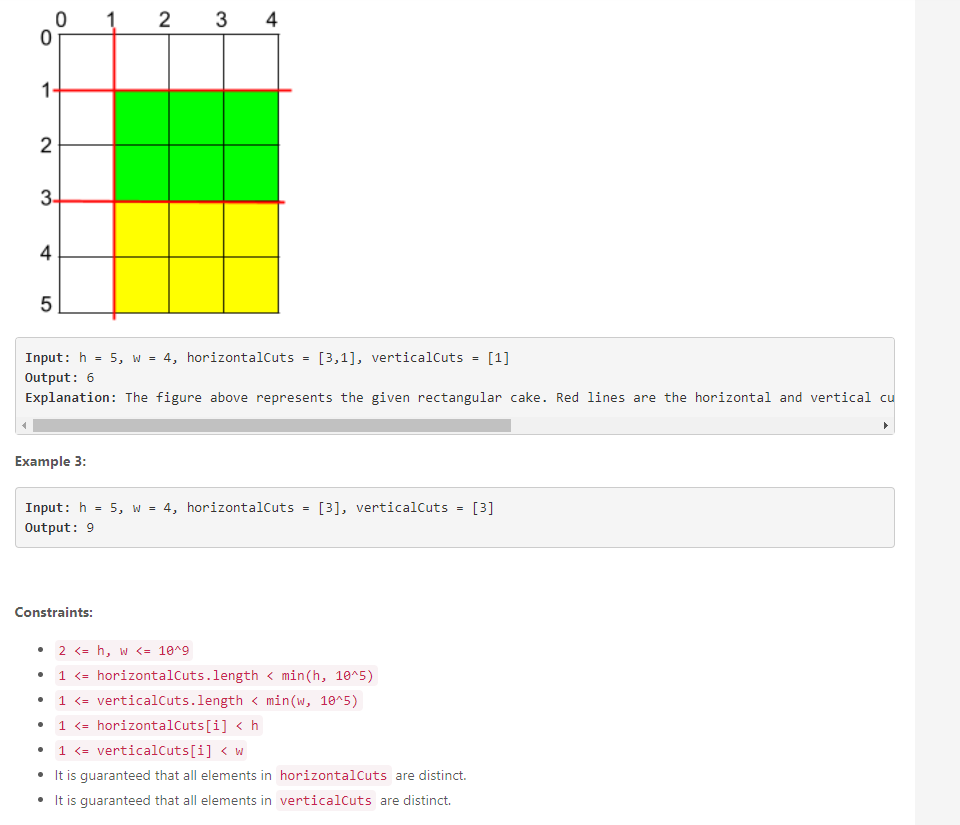

In [ ]:
# My solution: Time limit exceeded (Brute Force)
class Solution:
    def maxArea(self, h: int, w: int, horizontalCuts: List[int], verticalCuts: List[int]) -> int:
        horizontalCuts.sort()
        verticalCuts.sort()
        
        horizontalCuts = [0] + horizontalCuts + [h]
        verticalCuts = [0] + verticalCuts + [w]
        max_area = 0
        # possible y
        for y1, y2 in zip(verticalCuts, verticalCuts[1:]):
            for x1, x2 in zip(horizontalCuts, horizontalCuts[1:]):
                max_area = max(abs(y2 - y1)*abs(x2 - x1), max_area)
        return max_area

# faster but failed the test case 1000000 
class Solution:
    def maxArea(self, h: int, w: int, horizontalCuts: List[int], verticalCuts: List[int]) -> int:        
        horizontalCuts = sorted([0] + horizontalCuts + [h])
        verticalCuts = sorted([0] + verticalCuts + [w])
        max_y, max_x = 0,0

        for y1, y2 in zip(verticalCuts, verticalCuts[1:]):
            max_y = max(abs(y2-y1), max_y)
            
        for x1, x2 in zip(horizontalCuts, horizontalCuts[1:]):
            max_x = max(abs(x2-x1), max_x)

        return max_x*max_y

# Fix by change the return to max_x*max_y % (10**9 + 7)
class Solution:
    def maxArea(self, h: int, w: int, horizontalCuts: List[int], verticalCuts: List[int]) -> int:        
        horizontalStrips = [0] + sorted(horizontalCuts) + [h]
        verticalStrips = [0] + sorted(verticalCuts) + [w]
        max_y, max_x = 0,0

        for x in range(len(horizontalStrips) - 1):
            max_x = max(horizontalStrips[x+1]-horizontalStrips[x], max_x)
            
        for y in range(len(verticalStrips) - 1):
            max_y = max(verticalStrips[y+1]-verticalStrips[y], max_y)

        return max_x*max_y % (10**9 + 7)

        
